# Dealing with Spin in Fermi Surface 3D Visualization

This tutorial provides a comprehensive guide to handling different spin configurations when plotting 3D Fermi surfaces using PyProcar's `FermiHandler` class. Understanding how PyProcar handles spin is crucial for correctly interpreting and visualizing magnetic Fermi surfaces.

## Understanding Spin in Fermi Surface Calculations

PyProcar handles spin differently depending on the type of magnetic calculation:

### Spin-Polarized Case (Collinear Magnetism)
In spin-polarized calculations, the spin-up and spin-down channels are separate entities:
- There are **two distinct spin channels** (spin-up and spin-down)
- Each spin channel has its own Fermi surface topology
- You can visualize Fermi surfaces for each spin channel independently
- Different spin channels can have dramatically different Fermi surface shapes
- Useful for studying spin-dependent transport and magnetic properties

### Non-Collinear Case (Non-Collinear Magnetism)  
In non-collinear magnetic calculations, the situation is more complex:
- Spin-up and spin-down **mix at each k-point**
- There is only **1 spin channel** but with **spin texture information**
- The **spin texture mode** can visualize local spin directions on the Fermi surface
- Spin directions are represented as 3D arrows on the surface
- Essential for understanding complex magnetic structures and spin-orbit coupling effects

### Key Differences for Fermi Surfaces
- **Collinear**: Separate Fermi surfaces for each spin channel
- **Non-collinear**: One Fermi surface with spin direction arrows
- **Analysis**: Spin-resolved vs. spin-textured approaches

This tutorial will demonstrate both approaches with practical examples.



## 1. Setup and Data Loading

We'll use both spin-polarized and non-collinear examples to demonstrate the different approaches to handling spin in Fermi surface calculations.


In [1]:
# Import required libraries
from pathlib import Path
import pyprocar

CURRENT_DIR = Path(".").resolve()
SPIN_POL_PATH = "data/examples/fermi3d/spin-polarized"
NON_COLLINEAR_PATH = "data/examples/fermi3d/non-colinear"
pyprocar.download_from_hf(relpath=SPIN_POL_PATH, output_path=CURRENT_DIR)
pyprocar.download_from_hf(relpath=NON_COLLINEAR_PATH, output_path=CURRENT_DIR)
SPIN_POL_DATA_DIR = CURRENT_DIR / SPIN_POL_PATH
NON_COLLINEAR_DATA_DIR = CURRENT_DIR / NON_COLLINEAR_PATH
print(f"Data downloaded to: {SPIN_POL_DATA_DIR}")
print(f"Data downloaded to: {NON_COLLINEAR_DATA_DIR}")

Data already exists at C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\examples\04-fermi3d\data\examples\fermi3d\spin-polarized
Data already exists at C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\examples\04-fermi3d\data\examples\fermi3d\non-colinear
Data downloaded to: C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\examples\04-fermi3d\data\examples\fermi3d\spin-polarized
Data downloaded to: C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\examples\04-fermi3d\data\examples\fermi3d\non-colinear


## 2. Spin-Polarized Fermi Surfaces (Collinear Magnetism)

In this section, we'll explore how to create and analyze 3D Fermi surfaces for spin-polarized systems. Spin-polarized calculations provide separate Fermi surfaces for spin-up and spin-down channels.

### Creating FermiHandler Objects for Spin-Polarized Data


First, let's create a FermiHandler object for our spin-polarized data and understand what we're working with.


In [2]:

# Create FermiHandler object for spin-polarized data
spinPolarizedFermiHandler = pyprocar.FermiHandler(
    code="vasp",
    dirname=SPIN_POL_DATA_DIR,
    apply_symmetry=True,  # Apply symmetry operations
    fermi=5.3017,         # Fermi energy
    use_cache=False,
    verbose=1
)

print("✅ Spin-polarized FermiHandler created!")
print("   - This system has separate spin-up and spin-down channels")
print("   - Each spin channel can have different Fermi surface topology")


If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

### 2.1 Plain Mode - Both Spin Channels

In plain mode, we can visualize the complete Fermi surface including both spin-up and spin-down channels. This gives us an overview of the overall electronic structure at the Fermi level.

In [3]:
# Plot Fermi surface with both spin channels
spinPolarizedFermiHandler.plot_fermi_surface(
    mode="plain",
    show=True
)

print("🔍 What you see:")
print("   - Complete Fermi surface topology")
print("   - Both spin-up and spin-down contributions")
print("   - Different colors represent different bands")

____________________________________________________________________________________________________

                There are additional plot options that are defined in a configuration file. 
                You can change these configurations by passing the keyword argument to the function
                To print a list of plot options set print_plot_opts=True

                Here is a list modes : plain , parametric , spin_texture , overlay
                Here is a list of properties: fermi_speed , fermi_velocity , harmonic_effective_mass
____________________________________________________________________________________________________
[INFO] 2025-06-13 10:51:52 - pyprocar.plotter.fermi3d_plot[301][process_data] - ___Processing data fermi surface___
[INFO] 2025-06-13 10:51:52 - pyprocar.plotter.fermi3d_plot[115][_determine_bands_near_fermi] - ___Determining bands near fermi___
[INFO] 2025-06-13 10:51:52 - pyprocar.plotter.fermi3d_plot[132][_determine_bands_near_fermi] - Bands

Widget(value='<iframe src="http://localhost:54235/index.html?ui=P_0x18450ac6080_0&reconnect=auto" class="pyvis…

To save an image of where the camera is at time when the window closes,
set the `save_2d` parameter and set `plotter_camera_pos` to the following: 
 [(0.5022336164014731, 0.5022336164014731, 0.5022336164014731),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 1.0)]
🔍 What you see:
   - Complete Fermi surface topology
   - Both spin-up and spin-down contributions
   - Different colors represent different bands


### 2.2 Analyzing Individual Spin Channels

For spin-polarized systems, we can visualize each spin channel separately. This is crucial for understanding:
- How magnetic ordering affects the Fermi surface topology
- Spin-dependent transport properties
- Differences between majority and minority spin carriers


In [4]:
# Plot only spin-up channel (majority spin)
print("Spin-Up Channel (Majority Spin):")
spinPolarizedFermiHandler.plot_fermi_surface(
    mode="plain",
    spins=[0],  # Only spin-up channel (index 0)
    show=True
)

print("📈 Majority spin channel:")
print("   - Usually more occupied in magnetic materials")
print("   - Often shows different topology than minority spin")

Spin-Up Channel (Majority Spin):
____________________________________________________________________________________________________

                There are additional plot options that are defined in a configuration file. 
                You can change these configurations by passing the keyword argument to the function
                To print a list of plot options set print_plot_opts=True

                Here is a list modes : plain , parametric , spin_texture , overlay
                Here is a list of properties: fermi_speed , fermi_velocity , harmonic_effective_mass
____________________________________________________________________________________________________
[INFO] 2025-06-13 10:51:55 - pyprocar.plotter.fermi3d_plot[301][process_data] - ___Processing data fermi surface___
[INFO] 2025-06-13 10:51:55 - pyprocar.plotter.fermi3d_plot[115][_determine_bands_near_fermi] - ___Determining bands near fermi___
[INFO] 2025-06-13 10:51:55 - pyprocar.plotter.fermi3d_plot[132][_de

Widget(value='<iframe src="http://localhost:54235/index.html?ui=P_0x18452cf2500_1&reconnect=auto" class="pyvis…

To save an image of where the camera is at time when the window closes,
set the `save_2d` parameter and set `plotter_camera_pos` to the following: 
 [(0.5022336164014731, 0.5022336164014731, 0.5022336164014731),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 1.0)]
📈 Majority spin channel:
   - Usually more occupied in magnetic materials
   - Often shows different topology than minority spin


In [5]:
# Plot only spin-down channel (minority spin)
print("Spin-Down Channel (Minority Spin):")
spinPolarizedFermiHandler.plot_fermi_surface(
    mode="plain",
    spins=[1],  # Only spin-down channel (index 1)
    show=True
)

print("📉 Minority spin channel:")
print("   - Usually less occupied in magnetic materials")
print("   - Can have completely different Fermi surface shape")
print("   - Important for understanding spin transport")


Spin-Down Channel (Minority Spin):
____________________________________________________________________________________________________

                There are additional plot options that are defined in a configuration file. 
                You can change these configurations by passing the keyword argument to the function
                To print a list of plot options set print_plot_opts=True

                Here is a list modes : plain , parametric , spin_texture , overlay
                Here is a list of properties: fermi_speed , fermi_velocity , harmonic_effective_mass
____________________________________________________________________________________________________
[INFO] 2025-06-13 10:51:59 - pyprocar.plotter.fermi3d_plot[301][process_data] - ___Processing data fermi surface___
[INFO] 2025-06-13 10:51:59 - pyprocar.plotter.fermi3d_plot[115][_determine_bands_near_fermi] - ___Determining bands near fermi___
[INFO] 2025-06-13 10:51:59 - pyprocar.plotter.fermi3d_plot[132][_

In [7]:
# Parametric mode: show orbital contributions for specific spin channel
print("Parametric Mode - Orbital Projections on Spin-Up Channel:")
atoms = [1]                # Atom indices for projection
orbitals = [4,5,6,7,8]     # d orbitals (indices 4-8)
spins = [0]                # Only spin-up channel

spinPolarizedFermiHandler.plot_fermi_surface(
    mode="parametric",
    atoms=atoms,
    orbitals=orbitals,
    spins=spins,
    show=True
)

print("🎨 Parametric visualization shows:")
print("   - Which orbitals contribute to the Fermi surface")
print("   - Color intensity represents orbital character")
print("   - Only for the selected spin channel")


Parametric Mode - Orbital Projections on Spin-Up Channel:
____________________________________________________________________________________________________

                There are additional plot options that are defined in a configuration file. 
                You can change these configurations by passing the keyword argument to the function
                To print a list of plot options set print_plot_opts=True

                Here is a list modes : plain , parametric , spin_texture , overlay
                Here is a list of properties: fermi_speed , fermi_velocity , harmonic_effective_mass
____________________________________________________________________________________________________
[INFO] 2025-06-13 11:07:29 - pyprocar.plotter.fermi3d_plot[301][process_data] - ___Processing data fermi surface___
[INFO] 2025-06-13 11:07:29 - pyprocar.plotter.fermi3d_plot[115][_determine_bands_near_fermi] - ___Determining bands near fermi___
[INFO] 2025-06-13 11:07:29 - pyprocar.plot

Widget(value='<iframe src="http://localhost:54235/index.html?ui=P_0x18450982aa0_2&reconnect=auto" class="pyvis…

To save an image of where the camera is at time when the window closes,
set the `save_2d` parameter and set `plotter_camera_pos` to the following: 
 [(0.5022336164014731, 0.5022336164014731, 0.5022336164014731),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 1.0)]
🎨 Parametric visualization shows:
   - Which orbitals contribute to the Fermi surface
   - Color intensity represents orbital character
   - Only for the selected spin channel


## 3. Non-Collinear Fermi Surfaces and Spin Texture

In non-collinear magnetic systems, the spin quantization axis is not fixed, and spin-up and spin-down states are mixed. For Fermi surfaces, this opens up the powerful **spin texture mode** where we can visualize the local spin directions on the surface.

### Creating FermiHandler for Non-Collinear Data


In [8]:
# Create FermiHandler object for non-collinear data
nonCollinearFermiHandler = pyprocar.FermiHandler(
    code="vasp",
    dirname=NON_COLLINEAR_DATA_DIR,
    apply_symmetry=True,  # Apply symmetry operations (NOTE: may need to be False for some cases)
    fermi=5.3017,         # Fermi energy
    use_cache=False,
    verbose=1
)

print("✅ Non-collinear FermiHandler created!")
print("   - This system has mixed spin-up/spin-down states")
print("   - Spin directions vary in space")
print("   - Perfect for spin texture visualization")


If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

### 3.1 Plain Mode - Basic Non-Collinear Fermi Surface

First, let's visualize the basic Fermi surface without spin texture information:


In [9]:
# Plot basic Fermi surface for non-collinear system
nonCollinearFermiHandler.plot_fermi_surface(
    mode="plain",
    show=True
)

print("🔍 Basic non-collinear Fermi surface:")
print("   - Shows overall topology without spin information")
print("   - Foundation for adding spin texture visualization")


____________________________________________________________________________________________________

                There are additional plot options that are defined in a configuration file. 
                You can change these configurations by passing the keyword argument to the function
                To print a list of plot options set print_plot_opts=True

                Here is a list modes : plain , parametric , spin_texture , overlay
                Here is a list of properties: fermi_speed , fermi_velocity , harmonic_effective_mass
____________________________________________________________________________________________________
[INFO] 2025-06-13 11:08:17 - pyprocar.plotter.fermi3d_plot[301][process_data] - ___Processing data fermi surface___
[INFO] 2025-06-13 11:08:17 - pyprocar.plotter.fermi3d_plot[115][_determine_bands_near_fermi] - ___Determining bands near fermi___
[INFO] 2025-06-13 11:08:17 - pyprocar.plotter.fermi3d_plot[132][_determine_bands_near_fermi] - Bands

Widget(value='<iframe src="http://localhost:54235/index.html?ui=P_0x18453149090_3&reconnect=auto" class="pyvis…

To save an image of where the camera is at time when the window closes,
set the `save_2d` parameter and set `plotter_camera_pos` to the following: 
 [(0.5022336164014731, 0.5022336164014731, 0.5022336164014731),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 1.0)]
🔍 Basic non-collinear Fermi surface:
   - Shows overall topology without spin information
   - Foundation for adding spin texture visualization


### 3.2 Spin Texture Mode - The Power of Non-Collinear Visualization

This is where non-collinear systems shine! The **spin texture mode** allows us to visualize the local spin directions directly on the Fermi surface using 3D arrows. This provides incredible insights into:

- **Spin-orbit coupling effects**
- **Magnetic anisotropy**
- **Topological properties**
- **Local magnetic ordering**

In [12]:
# Spin texture mode - arrows show spin directions
print("Spin Texture Mode - Local Spin Directions:")
nonCollinearFermiHandler.plot_fermi_surface(
    mode="spin_texture",
    spin_texture=True,       # Enable spin texture visualization
    texture_size=0.05,        # Size of the spin arrows
    show=True,
    max_distance=0.3,        # Max distance for interpolation
)

print("🧭 Spin texture visualization shows:")
print("   - 3D arrows representing local spin directions")
print("   - Arrow length indicates spin magnitude")
print("   - Colors can represent different properties")
print("   - Essential for understanding magnetic textures")

Spin Texture Mode - Local Spin Directions:
____________________________________________________________________________________________________

                There are additional plot options that are defined in a configuration file. 
                You can change these configurations by passing the keyword argument to the function
                To print a list of plot options set print_plot_opts=True

                Here is a list modes : plain , parametric , spin_texture , overlay
                Here is a list of properties: fermi_speed , fermi_velocity , harmonic_effective_mass
____________________________________________________________________________________________________
[INFO] 2025-06-13 11:11:40 - pyprocar.plotter.fermi3d_plot[301][process_data] - ___Processing data fermi surface___
[INFO] 2025-06-13 11:11:40 - pyprocar.plotter.fermi3d_plot[115][_determine_bands_near_fermi] - ___Determining bands near fermi___
[INFO] 2025-06-13 11:11:40 - pyprocar.plotter.fermi3d_plo

Widget(value='<iframe src="http://localhost:54235/index.html?ui=P_0x18454373670_6&reconnect=auto" class="pyvis…

To save an image of where the camera is at time when the window closes,
set the `save_2d` parameter and set `plotter_camera_pos` to the following: 
 [(0.5744193949539175, 0.5744225614506712, 0.574392066224288),
 (0.013905912637710571, 0.013909079134464264, 0.013878583908081055),
 (0.0, 0.0, 1.0)]
🧭 Spin texture visualization shows:
   - 3D arrows representing local spin directions
   - Arrow length indicates spin magnitude
   - Colors can represent different properties
   - Essential for understanding magnetic textures


In [13]:
# Customizing spin texture visualization
print("Customized Spin Texture - Enhanced Visualization:")
nonCollinearFermiHandler.plot_fermi_surface(
    mode="spin_texture",
    spin_texture=True,
    extended_zone_directions=[[0, 0, 1], [0, 0, -1]],
    texture_size=0.05,        # Larger arrows for better visibility
    texture_cmap="viridis",  # Custom colormap for arrows
    surface_opacity=0.2,     # Semi-transparent surface
    spins=[3], # sz
    show=True,
    max_distance=0.3
)

print("🎨 Customization options:")
print("   - texture_size: Controls arrow size")
print("   - arrow_size: Additional size control")
print("   - texture_cmap: Colormap for arrows")
print("   - surface_opacity: Surface transparency")


Customized Spin Texture - Enhanced Visualization:
____________________________________________________________________________________________________

                There are additional plot options that are defined in a configuration file. 
                You can change these configurations by passing the keyword argument to the function
                To print a list of plot options set print_plot_opts=True

                Here is a list modes : plain , parametric , spin_texture , overlay
                Here is a list of properties: fermi_speed , fermi_velocity , harmonic_effective_mass
____________________________________________________________________________________________________
[INFO] 2025-06-13 11:14:29 - pyprocar.plotter.fermi3d_plot[301][process_data] - ___Processing data fermi surface___
[INFO] 2025-06-13 11:14:29 - pyprocar.plotter.fermi3d_plot[115][_determine_bands_near_fermi] - ___Determining bands near fermi___
[INFO] 2025-06-13 11:14:29 - pyprocar.plotter.ferm

Widget(value='<iframe src="http://localhost:54235/index.html?ui=P_0x18454595540_7&reconnect=auto" class="pyvis…

To save an image of where the camera is at time when the window closes,
set the `save_2d` parameter and set `plotter_camera_pos` to the following: 
 [(1.0267183487688203, 1.026721515265574, 1.0266910200391908),
 (0.013905912637710571, 0.013909079134464264, 0.013878583908081055),
 (0.0, 0.0, 1.0)]
🎨 Customization options:
   - texture_size: Controls arrow size
   - arrow_size: Additional size control
   - texture_cmap: Colormap for arrows
   - surface_opacity: Surface transparency


## 4. Advanced Spin Analysis Techniques

### 4.1 Cross-Section Analysis with Spin Information

Cross-sections can reveal how spin texture varies through different planes of the Fermi surface:

Cross-section analysis with spin texture:
____________________________________________________________________________________________________

                There are additional plot options that are defined in a configuration file. 
                You can change these configurations by passing the keyword argument to the function
                To print a list of plot options set print_plot_opts=True

                Here is a list modes : plain , parametric , spin_texture , overlay
                Here is a list of properties: fermi_speed , fermi_velocity , harmonic_effective_mass
____________________________________________________________________________________________________
[INFO] 2025-06-13 11:23:30 - pyprocar.plotter.fermi3d_plot[301][process_data] - ___Processing data fermi surface___
[INFO] 2025-06-13 11:23:30 - pyprocar.plotter.fermi3d_plot[115][_determine_bands_near_fermi] - ___Determining bands near fermi___
[INFO] 2025-06-13 11:23:30 - pyprocar.plotter.fermi3d_plot

Widget(value='<iframe src="http://localhost:54235/index.html?ui=P_0x18450ac7640_9&reconnect=auto" class="pyvis…

Widget(value='<iframe src="http://localhost:54235/index.html?ui=P_0x1840211aaa0_9&reconnect=auto" class="pyvis…

🔍 Cross-section analysis reveals:
   - How spin directions change through the surface
   - 2D projection of 3D magnetic structure
   - Useful for understanding spin transport paths


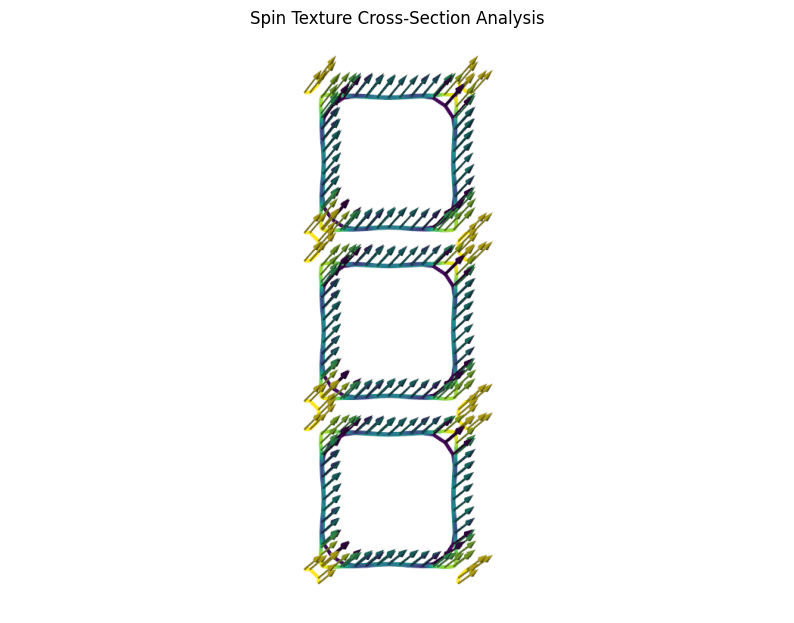

📊 Cross-section visualization shows:
   - 2D projection of spin directions
   - Color-coded spin orientation
   - Clear view of spin texture patterns


In [15]:
# Cross-section with spin texture
print("Cross-section analysis with spin texture:")
slice_normal = (1, 0, 0)    # Cut along x-direction
slice_origin = (0, 0, 0)    # Cut through origin

nonCollinearFermiHandler.plot_fermi_cross_section(
    slice_normal=slice_normal,
    slice_origin=slice_origin,
    extended_zone_directions=[[0, 0, 1], [0, 0, -1]],
    mode="spin_texture",
    spin_texture=True,
    arrow_size=0.05,
    surface_opacity=0.2,
    show=True,
    max_distance=0.3,
    save_2d_slice=NON_COLLINEAR_DATA_DIR / "spin_texture_cross_section.png"
)

print("🔍 Cross-section analysis reveals:")
print("   - How spin directions change through the surface")
print("   - 2D projection of 3D magnetic structure") 
print("   - Useful for understanding spin transport paths")


## 5. Summary: Mastering Spin in Fermi Surface Visualization

This tutorial demonstrated how to handle different spin configurations in PyProcar's Fermi surface visualization:

### Key Concepts Covered:

**Spin-Polarized (Collinear) Systems:**
- **Separate spin channels**: Use `spins=[0]` (spin-up) or `spins=[1]` (spin-down)
- **Independent analysis**: Each spin channel has its own Fermi surface topology
- **Parametric projections**: Can analyze orbital contributions for specific spin channels
- **Transport insights**: Essential for understanding spin-dependent electronic properties

**Non-Collinear Systems:**
- **Spin texture mode**: Revolutionary `mode="spin_texture"` with `spin_texture=True`
- **3D arrow visualization**: Local spin directions shown as arrows on the surface
- **Complex magnetic structures**: Essential for spin-orbit coupling and topological systems
- **Advanced analysis**: Cross-sections reveal spin texture variations

### Method Summary:

| System Type | Key Method | Main Arguments | Use Case |
|-------------|------------|----------------|----------|
| **Collinear** | `plot_fermi_surface()` | `spins=[0]` or `spins=[1]` | Spin-resolved transport |
| **Non-collinear** | `plot_fermi_surface()` | `mode="spin_texture", spin_texture=True` | Magnetic textures |
| **Analysis** | `plot_fermi_cross_section()` | `mode="spin_texture"` | Detailed spin structure |

### Best Practices:

1. **Choose the right approach**: Collinear → spin channels; Non-collinear → spin texture
2. **Optimize visualization**: Adjust `texture_size`, `arrow_size`, and `surface_opacity`
3. **Use cross-sections**: Reveal internal spin structure and transport pathways
4. **Consider supercells**: `supercell=[2,2,2]` for better spin texture visualization
5. **Experiment with parameters**: `max_distance` affects interpolation quality

### Physical Insights:

- **Collinear systems**: Compare majority vs minority spin Fermi surfaces
- **Non-collinear systems**: Understand complex magnetic ordering and topology
- **Both cases**: Essential for magnetic materials, spintronics, and quantum materials

This powerful combination of techniques opens up detailed analysis of magnetic Fermi surfaces!
